###Las 3 lineas con las que empezamos cada notebook para poder visualizar las imágenes y gráficos dentro del notebook

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

###Importamos la librería FastAi

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
bs = 64
# bs = 16  BatchSize 

#Cargando los datos

**URLs** es una clase de los fastai.datasets , la importamos mediante fastai import * 

** PETS ** es un string que contiene la ubicación ‘https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet 19’

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

Al ejecutar .ls() obtenemos la ruta de destino de nuestro dataset

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

Asignaremos ahora como buena práctica las rutas de las anotaciones y de las imágenes

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

get_image_files retorna una lista con todos los nombres de los archivos de las imágenes de la carpeta que pasamos.

In [7]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_177.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_32.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_239.jpg')]

Los nombres de los archivos de imágenes tienen el nombre de la raza de los perros y gatos, necesitaremos ahora una manera para extraer el nombre y para esto usaremos expresiones regulares.

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

Hasta ahora podemos decir:


*   path_img: una ruta que contiene las imágenes
*   fnames: una lista con los nombres de los archivos
*   pat: una expresión regular para extraer la etiqueta de los nombres de los archivos
*   ds_tfm: Transformaciones, hablaremos de esto luego.
*   size: Tamaño de las imágenes con el que queremos trabajar.
*   bs: Tamaño del lote que va a ser entrenado en cada trabajo.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

ImageDataBunch.from_name_re va a retornar un objeto DataBunch, en FastAi cada cosa que modelas es un objeto DataBunch el cual contiene 2 o 3 datasets: training data, validation data, y opcionalmente test data. Para cada uno de estos contiene imágenes y etiquetas, o datos tabulados con sus etiquetas y así...

Si ahora queremos mirar unas cuantas imágenes del lote podemos usar ImageDataBunch.show_batch. El argumento rows es el número de filas y columnas para mostrar y figsize es el tamaño de las imágenes a mostrar.

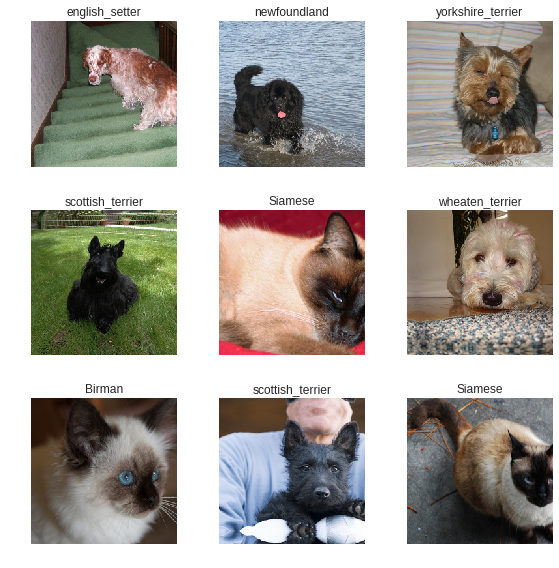

In [11]:
data.show_batch(rows=3, figsize=(8,8))

Imprimiremos ahora data.classes que son los nombres de las razas que previamente ya extraimos usando expresiones regulares.

In [12]:
print(data.classes)
len(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

#Entrenando el modelo

Usamos la funcion create_cnn la cual crea una red neuronal convolucional, le asignamos obviamente nuestros datos (data) que previamente ya habíamos cargado, luego el modelo (en este caso resnet34) y las métricas las cuales nos muestran luego nuestros errores

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate) 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 55585546.90it/s]


Si ahora queremos ver la arquitectura de nuestro modelo 

In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

Entrenaremos 4 ciclos a través de toda nuestra data 

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.428583,0.355464,0.107578
2,0.564688,0.263642,0.082544
3,0.343446,0.204189,0.062923
4,0.262103,0.198142,0.069012


Acabamos de entrenar un modelo. No sabemos exactamente qué implicó eso o cómo sucedió, pero sí sabemos que con 4 o 5 líneas de código, construimos algo que rompió todos los records del 2012. 6.9% de error y en tan solo 8 minutos Ciertamente suena bastante impresionante para algo que puede reconocer diferentes razas de perros y gatos, pero no sabemos realmente por qué funciona, pero lo haremos. No se preocupen

Ahora guardamos nuestro modelo entrenado. 

In [0]:
learn.save('stage-1')

#Resultados

Procedemos a la interpretación del modelo

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

Una buena práctica que debemos seguir es imprimir los errores más comunes

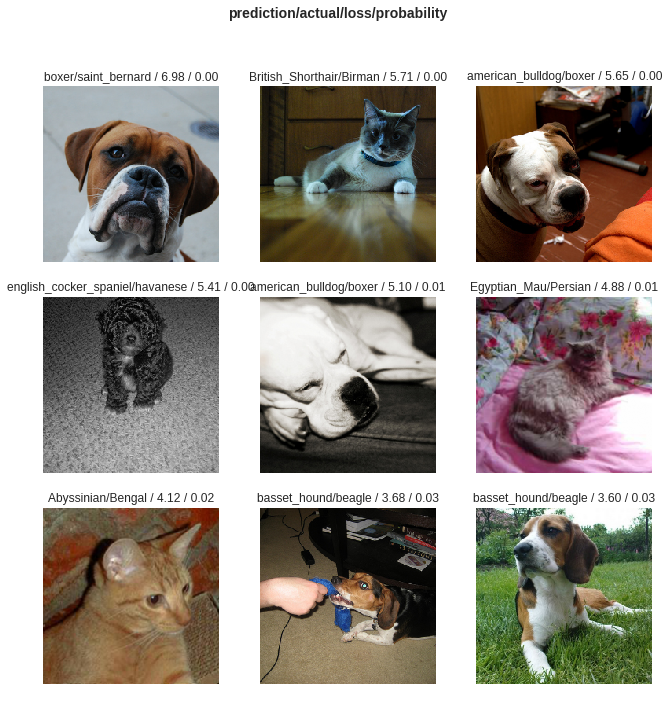

In [19]:
interp.plot_top_losses(9, figsize=(11,11))

Notamos que se imprime un texto arriba de cada imagen. ¿Qué significa?

Una de las cosas más importantes sobre los datos obtenidos es su interpretación y podemos usar matrices de confusión u otros gráficos.

In [0]:


doc(interp.plot_top_losses)



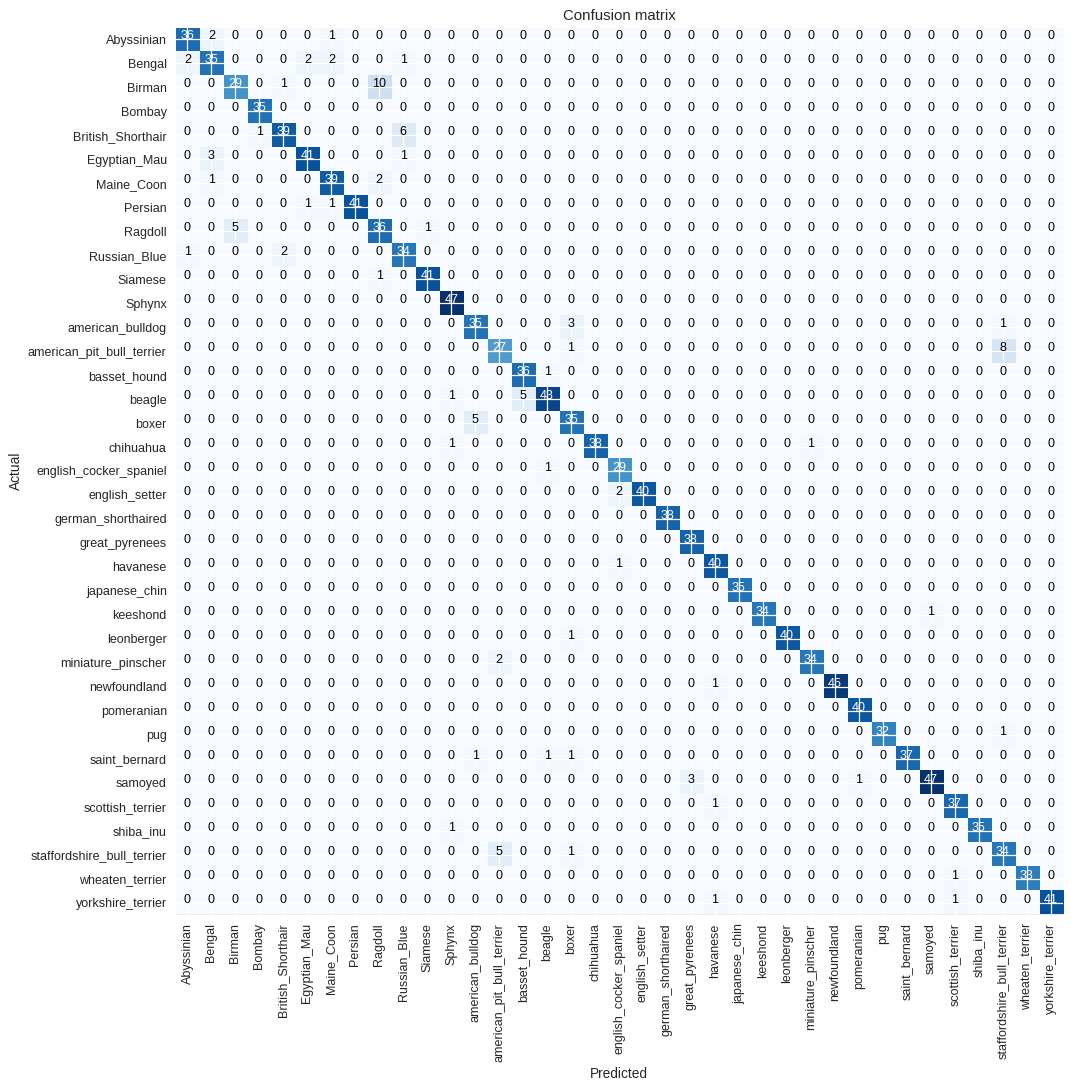

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=90)

Si tenemos muchos datos lo mejor no será una matriz sino una lista.

In [23]:
interp.most_confused(min_val=2)

[('Birman', 'Ragdoll', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 5),
 ('beagle', 'basset_hound', 5),
 ('boxer', 'american_bulldog', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Egyptian_Mau', 'Bengal', 3),
 ('american_bulldog', 'boxer', 3),
 ('samoyed', 'great_pyrenees', 3)]

#Mejorando el modelo.
###Sincronizando las tasas de aprendizaje

Corramos ahora “learning rate finder”. Aprenderemos sobre esto la siguiente clase. Esta es lo que indica cuán rápido puedo entrenar la red neuronal sin “descarrilarla”

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Graficamos los resultados

Min numerical gradient: 1.10E-06


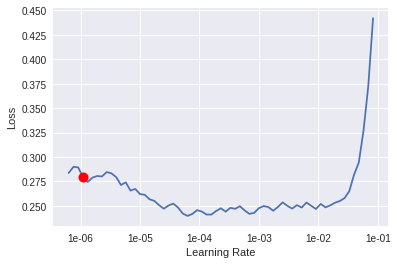

In [25]:
learn.recorder.plot()

Estograficará el resultado de nuestro buscador LR y lo que esto básicamente  muestra es este parámetro clave llamado tasa de aprendizaje (Learning rate). La tasa de aprendizaje básicamente dice qué tan rápido estoy actualizando los parámetros en mi modelo. El eje x  me muestra lo que sucede a medida que aumenta la velocidad de aprendizaje. El eje y muestra  la pérdida. Como puede ver, una vez que la tasa de aprendizaje pasa de 10 ^ -2, mi pérdida empeora. Debido a que estamos tratando de ajustar las cosas ahora, no podemos utilizar una tasa de aprendizaje tan alta. Entonces, basándome en el buscador de la tasa de aprendizaje, tratamos de elegir algo bueno antes de que empeorara. Así que escogeremos 10 ^-5. Pero no tiene sentido entrenar todas las capas a ese ritmo, porque sabemos que las capas posteriores funcionaron bien antes cuando entrenábamos mucho más rápido. Entonces, lo que realmente podemos hacer es pasar un rango de tasas de aprendizaje a learn.fit_one_cycle. Y lo hacemos así:

In [26]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.225145,0.199125,0.068336
2,0.231105,0.196896,0.064276


Mejoramos el modelo. Pasamos de 6.9% de error a 6.4% 